In [3]:
#importing the necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#importing numpy and panda
import numpy as np
import pandas as pd

#librariers to build models and checking accuracy
import sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols

#library to split data
from sklearn.model_selection import train_test_split

#library for EDA
from scipy.stats import zscore

#Library for saving data
import pickle

#library for GridSearchCV 
from sklearn.model_selection import GridSearchCV

#library for error detection in regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error

#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('temperature.csv')

#show all columns in dataframe
pd.set_option('display.max_columns', None)


df.head(50)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,30-06-2013,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,0.232841,0.146363,0.000000,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,30-06-2013,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,0.389600,0.333570,0.270419,0.145705,0.000000,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,30-06-2013,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,0.357856,0.344928,0.272387,0.143841,0.000000,0.000000,0.000000,0.000000,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,30-06-2013,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,0.408766,0.344800,0.264980,0.148911,0.000000,0.000000,0.000000,0.000000,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,30-06-2013,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,0.348292,0.306255,0.245254,0.135443,0.000000,0.000000,0.000000,0.000000,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [3]:
print(df.columns)

print("length of columns is ",len(df.columns))

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')
length of columns is  25


# Data Description

Observations:

1.The dataset has 25 columns

2.There is only numerical data

3.Labels are two :

    next-day maximum: Next_Tmax

    minimum air temperatures: Next_Tmin

4.The data consists of features which are:

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

# Statistical data analysis

In [4]:
df.describe(include='all')

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7750,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
unique,NaN,310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,22-08-2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,13.000000,NaN,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,NaN,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,NaN,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,NaN,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,NaN,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,NaN,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000


Observations:

1.There is no column with single unique values

2.Total number of datas present is 7752

3.Outliers are seen in LDAPS_LH	,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation

# Feature engineering

In [5]:
# renaming
df.rename(columns = {'Present_Tmax':'Present day Maximum air temperature'}, inplace = True)
df.rename(columns = {'Present_Tmin':'Present day Minimum air temperature'}, inplace = True)
df.rename(columns = {'LDAPS_RHmin':'next-day minimum relative humidity'}, inplace = True)
df.rename(columns = {'LDAPS_RHmax':'next-day maximum relative humidity'}, inplace = True)
df.rename(columns = {'LDAPS_Tmax_lapse':'next day maximum air temperature applied lapse rate'}, inplace = True)
df.rename(columns = {'LDAPS_Tmin_lapse':'next day minimum air temperature applied lapse rate'}, inplace = True)
df.rename(columns = {'LDAPS_WS':'next day average wind speed'}, inplace = True)
df.rename(columns = {'LDAPS_LH':'next day average latent heat flux'}, inplace = True)

df.rename(columns = {'LDAPS_CC1':'1st 6hour split average cloud cover'}, inplace = True)
df.rename(columns = {'LDAPS_CC2':'2nd 6hour split average cloud cover'}, inplace = True)
df.rename(columns = {'LDAPS_CC3':'3rd 6hour split average cloud cover'}, inplace = True)
df.rename(columns = {'LDAPS_CC4':'4th 6hour split average cloud cover'}, inplace = True)
df.rename(columns = {'LDAPS_PPT1':'1st 6hour split average precipitation'}, inplace = True)
df.rename(columns = {'LDAPS_PPT2':'2nd 6hour split average precipitation'}, inplace = True)
df.rename(columns = {'LDAPS_PPT3':'3rd 6hour split average cloud cover'}, inplace = True)
df.rename(columns = {'LDAPS_PPT4':'4th 6hour split average precipitation '}, inplace = True)

df.rename(columns = {'lat':'Latitude'}, inplace = True)
df.rename(columns = {'lon':'Longitude'}, inplace = True)
df.rename(columns = {'DEM':'Elevation'}, inplace = True)

#labels
df.rename(columns = {'Next_Tmax':'next day maximum air temperature'}, inplace = True)
df.rename(columns = {'Next_Tmin':'next day minimum air temperatures'}, inplace = True)


In [6]:
#extracting Date into more usable format
df["day"] = pd.to_datetime(df["Date"], format="%d-%m-%Y").dt.day
df["month"] = pd.to_datetime(df["Date"], format = "%d-%m-%Y").dt.month
df["year"] = pd.to_datetime(df["Date"], format = "%d-%m-%Y").dt.year

## Now we can drop Date as it is of no use
df.drop(["Date"], axis = 1, inplace = True)
df

,station,Present day Maximum air temperature,Present day Minimum air temperature,next-day minimum relative humidity,next-day maximum relative humidity,next day maximum air temperature applied lapse rate,next day minimum air temperature applied lapse rate,next day average wind speed,next day average latent heat flux,1st 6hour split average cloud cover,2nd 6hour split average cloud cover,3rd 6hour split average cloud cover,4th 6hour split average cloud cover,1st 6hour split average precipitation,2nd 6hour split average precipitation,3rd 6hour split average cloud cover,4th 6hour split average precipitation,Latitude,Longitude,Elevation,Slope,Solar radiation,next day maximum air temperature,next day minimum air temperatures,day,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,30.0,8.0,2017.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,30.0,8.0,2017.0
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,30.0,8.0,2017.0
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN


In [7]:
df["year"].describe()

count    7750.000000
mean     2015.000000
std         1.414305
min      2013.000000
25%      2014.000000
50%      2015.000000
75%      2016.000000
max      2017.000000
Name: year, dtype: float64

Not dropping year as, data consists of many years

# Graphical data analysis

# 1.Station

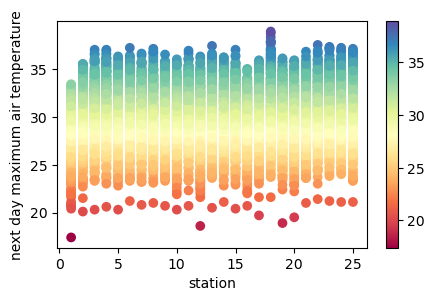

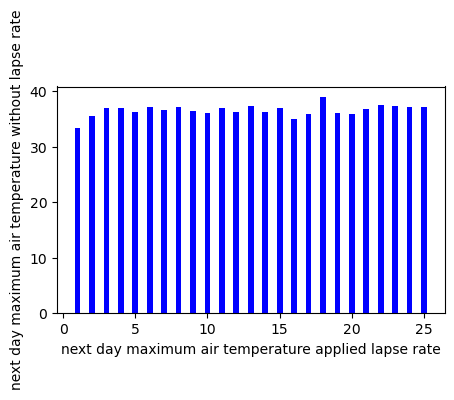

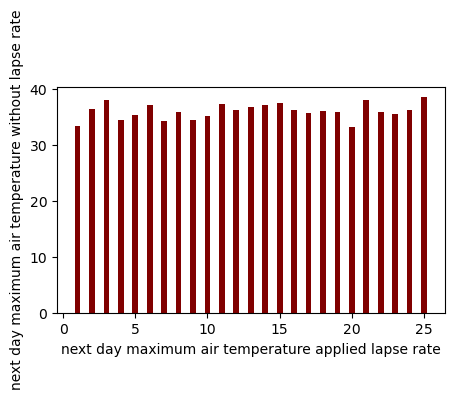

In [8]:
#station and min/max temperature of next day
x =df["station"] 
y = df["next day maximum air temperature"]
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('station')
plt.ylabel('next day maximum air temperature')
plt.show()


plt.bar(x, y, color ='blue',width = 0.4)
plt.xlabel("next day maximum air temperature applied lapse rate")
plt.ylabel("next day maximum air temperature without lapse rate")
plt.show()



plt.bar(x, df["next day maximum air temperature applied lapse rate"], color ='maroon',width = 0.4)
plt.xlabel("next day maximum air temperature applied lapse rate")
plt.ylabel("next day maximum air temperature without lapse rate")
plt.show()

Station 20 shows the highest temperature without lapse rate and station 3,21 and 25 shows highest temperature with lapse rate

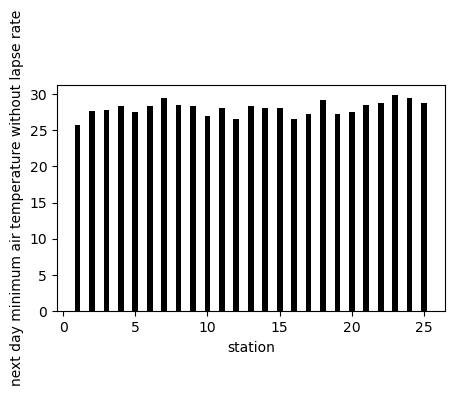

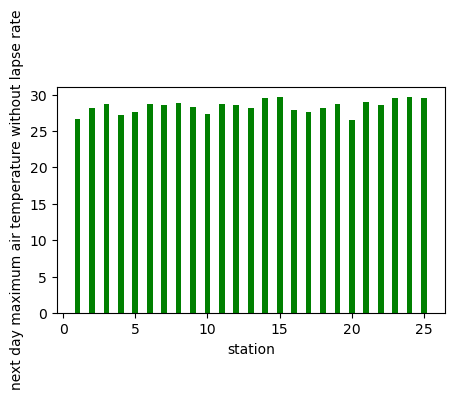

In [9]:
x =df["station"] 
y = df["next day minimum air temperatures"]


plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("station")
plt.ylabel("next day minimum air temperature without lapse rate")
plt.show()

plt.bar(x, df["next day minimum air temperature applied lapse rate"], color ='green',width = 0.4)
plt.xlabel("station")
plt.ylabel("next day maximum air temperature without lapse rate")
plt.show()

Minimum temp is seen in station 1 without lapse rate and station 19 with lapse rate

# 2.Present day Maximum air temperature and Present day Minimum air temperature

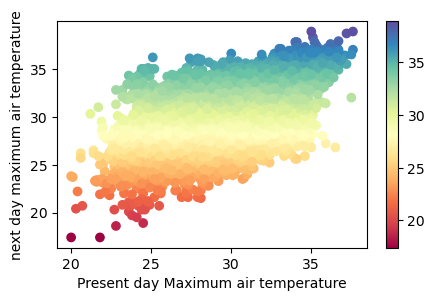

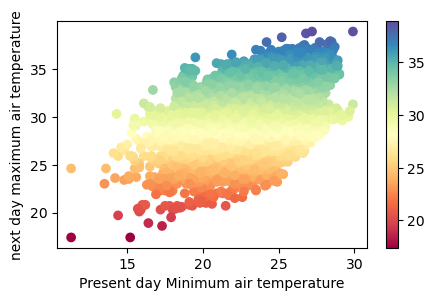

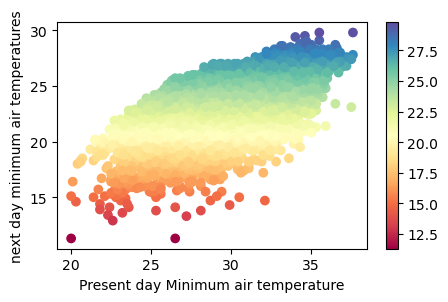

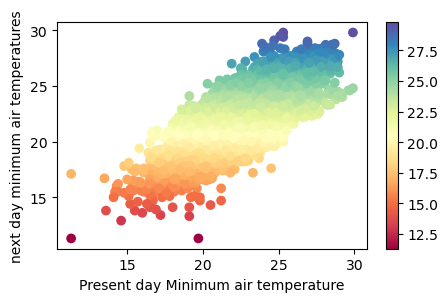

In [10]:
#with next day maximum air temperature
x =df["Present day Maximum air temperature"] 
y = df["next day maximum air temperature"]
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Present day Maximum air temperature')
plt.ylabel('next day maximum air temperature')
plt.show()

x =df["Present day Minimum air temperature"] 
y = df["next day maximum air temperature"]
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Present day Minimum air temperature')
plt.ylabel('next day maximum air temperature')
plt.show()

#with next day minimum air temperatures
x =df["Present day Maximum air temperature"] 
y = df["next day minimum air temperatures"]
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Present day Minimum air temperature')
plt.ylabel('next day minimum air temperatures')
plt.show()

x =df["Present day Minimum air temperature"] 
y = df["next day minimum air temperatures"]
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Present day Minimum air temperature')
plt.ylabel('next day minimum air temperatures')
plt.show()

The previous day maximum and minimum temperature have a direct relation to the next day maximimum and minimum temperature

# 3.with relative humdity


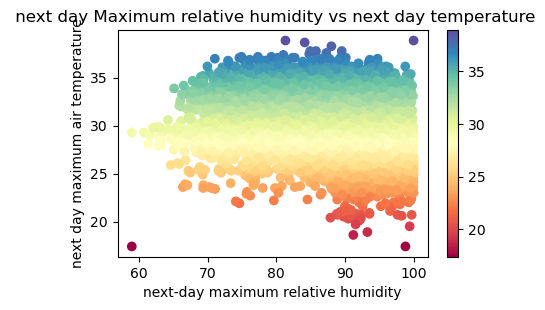

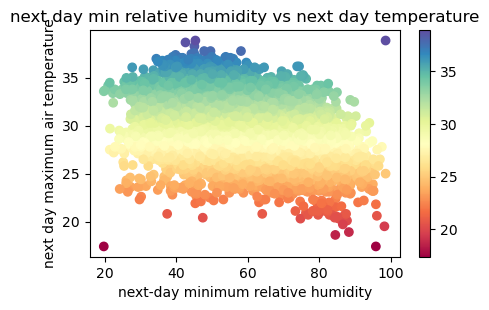

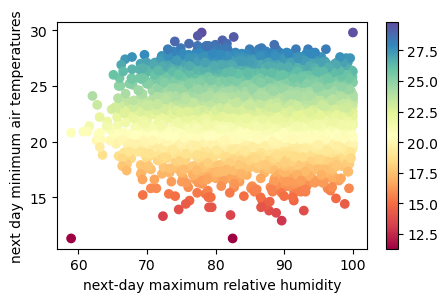

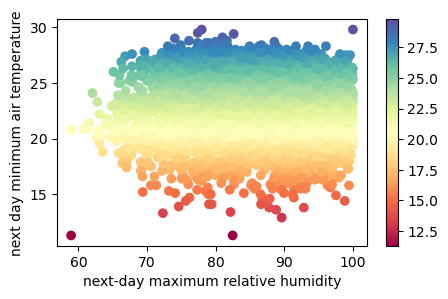

In [11]:
#with next day maximum air temperature
x =df["next-day maximum relative humidity"] 
y = df["next day maximum air temperature"]
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.title(' next day Maximum relative humidity vs next day temperature')
plt.xlabel('next-day maximum relative humidity')
plt.ylabel('next day maximum air temperature')
plt.show()

x =df["next-day minimum relative humidity"] 
y = df["next day maximum air temperature"]
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.title('next day min relative humidity vs next day temperature')
plt.xlabel('next-day minimum relative humidity')
plt.ylabel('next day maximum air temperature')
plt.show()

#with next day minimum air temperatures
x =df["next-day maximum relative humidity"] 
y = df["next day minimum air temperatures"]
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('next-day maximum relative humidity')
plt.ylabel('next day minimum air temperatures')
plt.show()

x =df["next-day maximum relative humidity"] 
y = df["next day minimum air temperatures"]
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('next-day maximum relative humidity')
plt.ylabel('next day minimum air temperature')
plt.show()

1. Some outliers can be seen in the relative humidity. 

2. No direct correlation can be seen between relative humidity and next day maximum and minimum temperature

# 4.With next day max/min temp applied at lapse rate

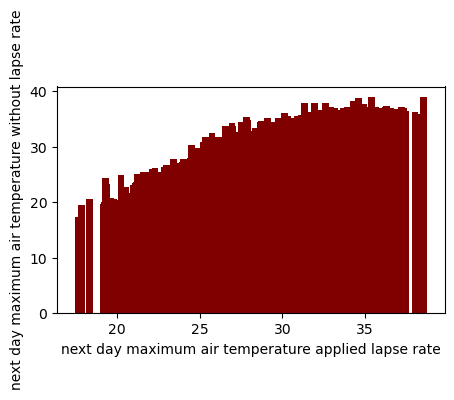

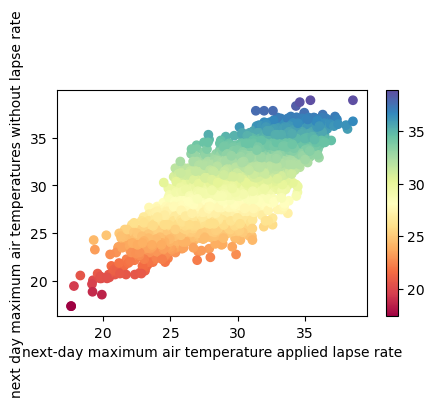

In [12]:
x=df["next day maximum air temperature applied lapse rate"]
y=df["next day maximum air temperature"]

plt.bar(x, y, color ='maroon',width = 0.4)
plt.xlabel("next day maximum air temperature applied lapse rate")
plt.ylabel("next day maximum air temperature without lapse rate")
plt.show()

plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('next-day maximum air temperature applied lapse rate')
plt.ylabel('next day maximum air temperatures without lapse rate')
plt.show()

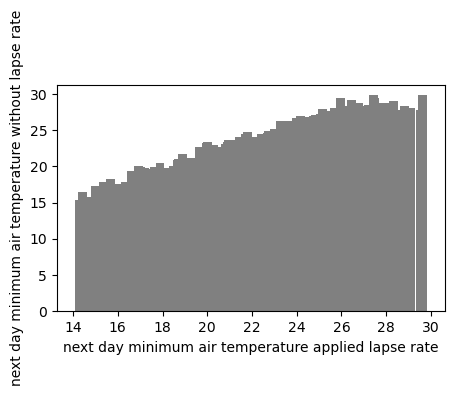

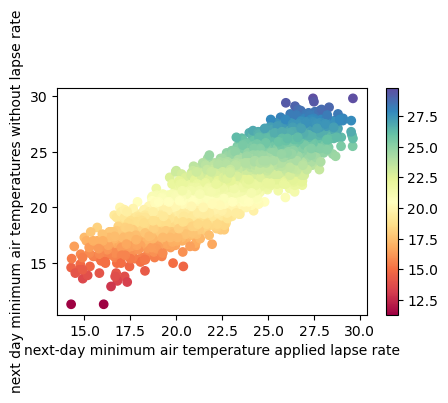

In [13]:
x=df["next day minimum air temperature applied lapse rate"]
y=df["next day minimum air temperatures"]

plt.bar(x, y, color ='grey',width = 0.4)
plt.xlabel("next day minimum air temperature applied lapse rate")
plt.ylabel("next day minimum air temperature without lapse rate")
plt.show()

plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('next-day minimum air temperature applied lapse rate')
plt.ylabel('next day minimum air temperatures without lapse rate')
plt.show()

Temperature at lapse rate and without lapse rate are directly proportional to each other

# 5.Next day average wind speed and latent heat flux

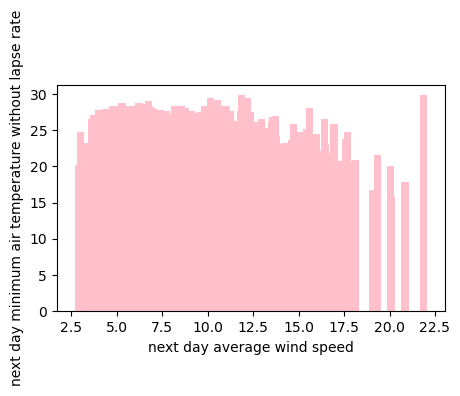

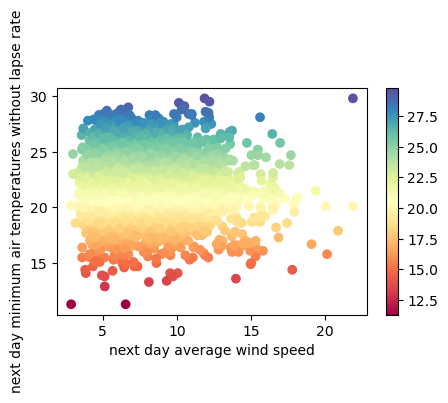

In [14]:
x=df["next day average wind speed"]
y=df["next day minimum air temperatures"]

plt.bar(x, y, color ='pink',width = 0.4)
plt.xlabel("next day average wind speed")
plt.ylabel("next day minimum air temperature without lapse rate")
plt.show()

plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('next day average wind speed')
plt.ylabel('next day minimum air temperatures without lapse rate')
plt.show()

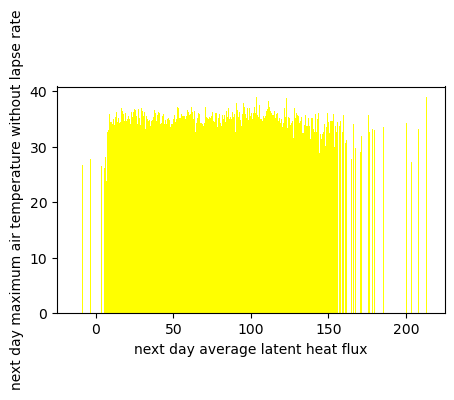

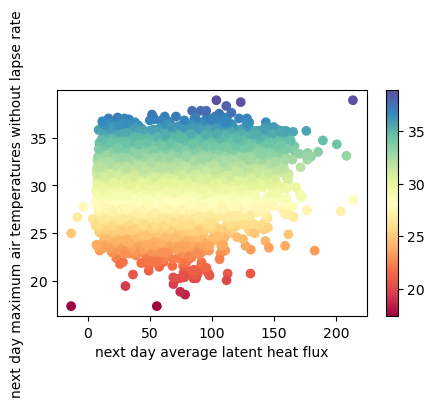

In [15]:
x=df["next day average latent heat flux"]
y=df["next day maximum air temperature"]

plt.bar(x, y, color ='yellow',width = 0.4)
plt.xlabel("next day average latent heat flux")
plt.ylabel("next day maximum air temperature without lapse rate")
plt.show()

plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('next day average latent heat flux')
plt.ylabel('next day maximum air temperatures without lapse rate')
plt.show()

1.Average wind speed and latent heat flux is not directly proportional to the temperature, although there is a slight relationship

2.There are outliers present in both average wind speed and latent heat flux

# 6. With latitude and longitutde

<AxesSubplot:>

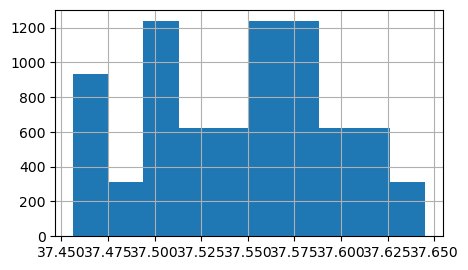

In [16]:
df["Latitude"].hist()

<AxesSubplot:>

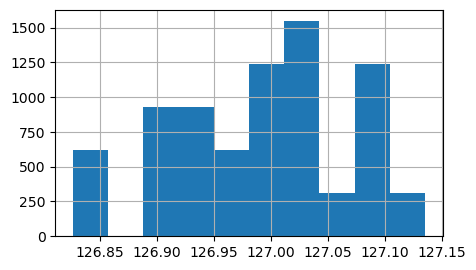

In [17]:
df["Longitude"].hist()

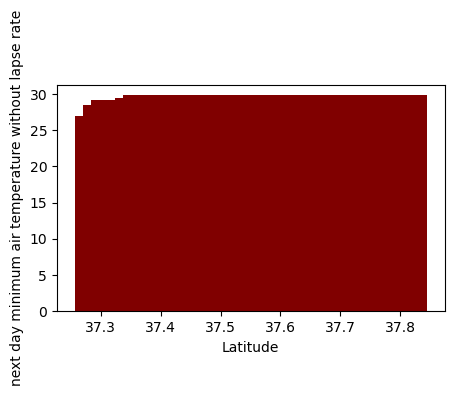

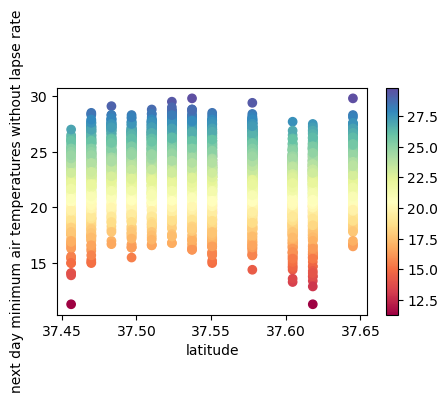

In [18]:
x=df["Latitude"]
y=df["next day minimum air temperatures"]

plt.bar(x, y, color ='maroon',width = 0.4)
plt.xlabel("Latitude")
plt.ylabel("next day minimum air temperature without lapse rate")
plt.show()

plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('latitude')
plt.ylabel('next day minimum air temperatures without lapse rate')
plt.show()

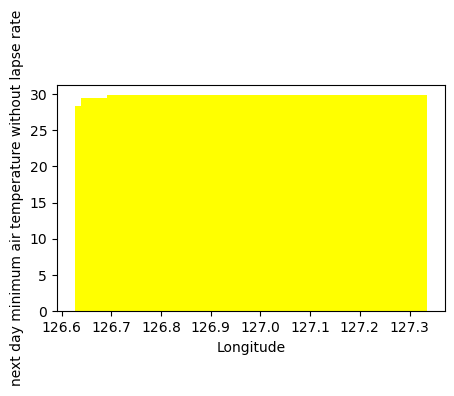

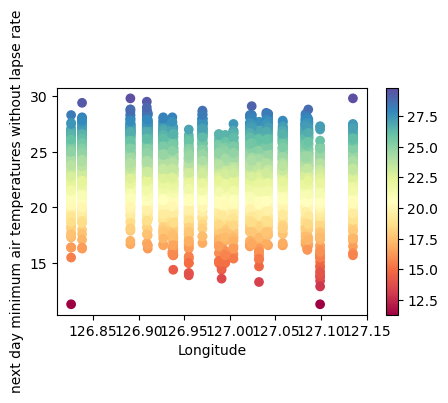

In [19]:
x=df["Longitude"]
y=df["next day minimum air temperatures"]

plt.bar(x, y, color ='yellow',width = 0.4)
plt.xlabel("Longitude")
plt.ylabel("next day minimum air temperature without lapse rate")
plt.show()

plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('next day minimum air temperatures without lapse rate')
plt.show()

1.Latitudes under observation are between 37.45 and 37.65

2.longitudes under observation are between 126.90 and 127.125

3.the minimum air temperature under the latitude and longitude under observations are the almost the same



# 7.Slope  

<AxesSubplot:>

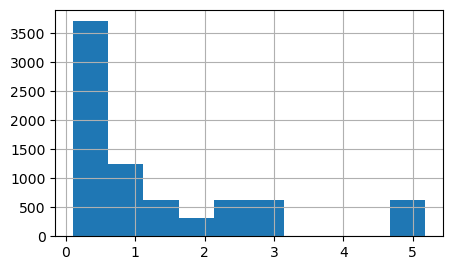

In [20]:
df["Slope"].hist()

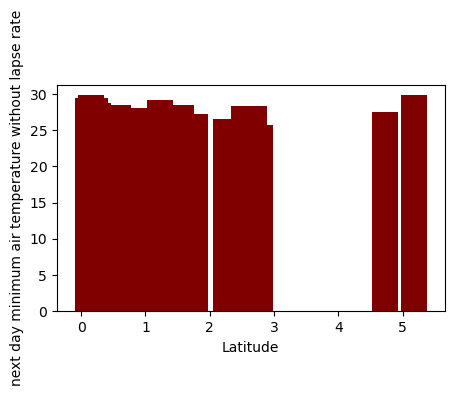

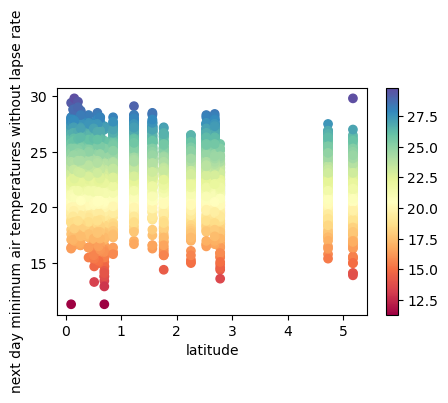

In [21]:
x=df["Slope"]
y=df["next day minimum air temperatures"]

plt.bar(x, y, color ='maroon',width = 0.4)
plt.xlabel("Latitude")
plt.ylabel("next day minimum air temperature without lapse rate")
plt.show()

plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('latitude')
plt.ylabel('next day minimum air temperatures without lapse rate')
plt.show()

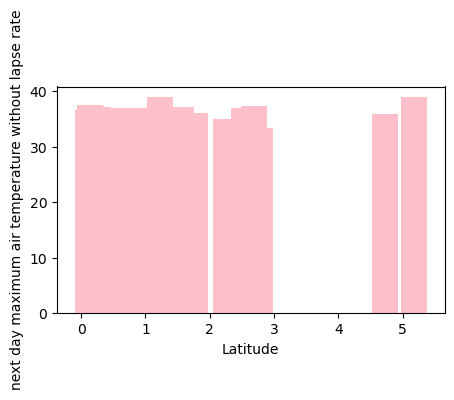

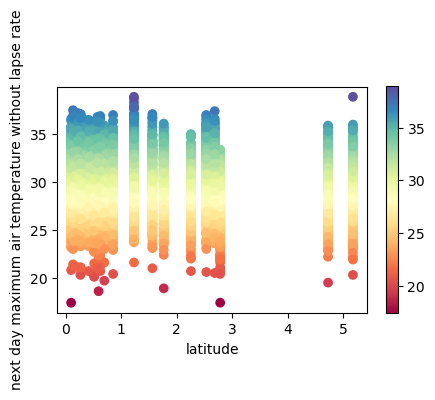

In [22]:
x=df["Slope"]
y=df["next day maximum air temperature"]

plt.bar(x, y, color ='pink',width = 0.4)
plt.xlabel("Latitude")
plt.ylabel("next day maximum air temperature without lapse rate")
plt.show()

plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('latitude')
plt.ylabel('next day maximum air temperature without lapse rate')
plt.show()

1. The observatories slope is between 0.1 to 3.1 and then 4.75 to 5.2. There are not observatories between that.

2.The minimum and maximum temperature are almost same in all the slope ranges present

# Feature Selection

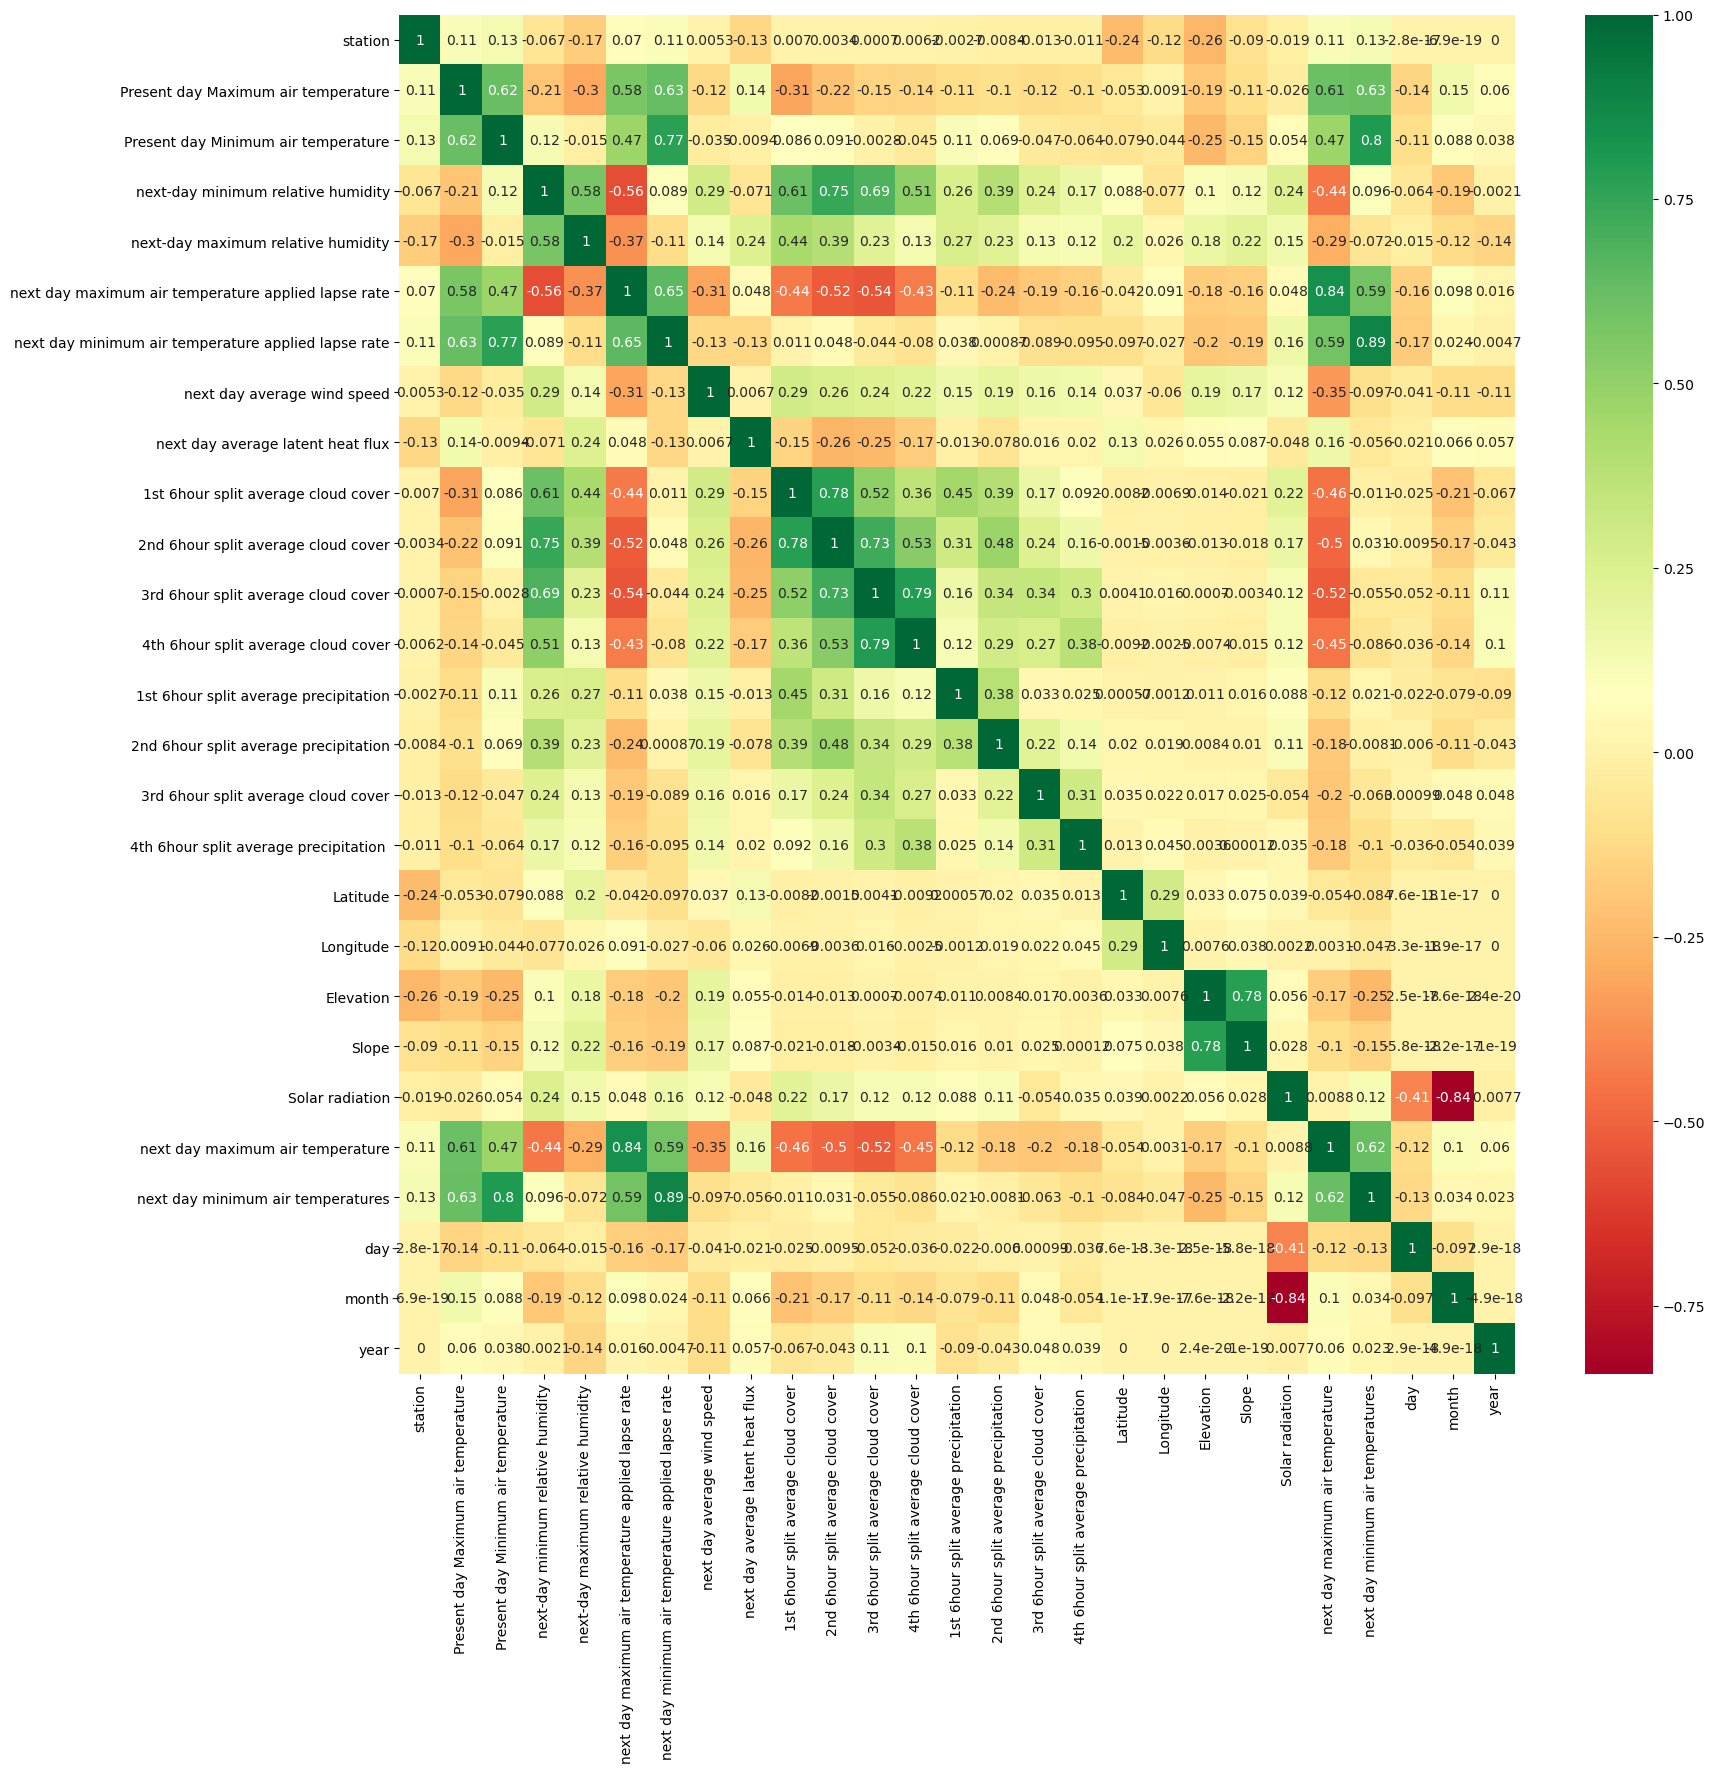

In [23]:
#heatmap
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

# EDA

In [30]:
df=pd.read_csv('temperature.csv')

# renaming
df.rename(columns = {'Present_Tmax':'Present day Maximum air temperature'}, inplace = True)
df.rename(columns = {'Present_Tmin':'Present day Minimum air temperature'}, inplace = True)
df.rename(columns = {'LDAPS_RHmin':'next-day minimum relative humidity'}, inplace = True)
df.rename(columns = {'LDAPS_RHmax':'next-day maximum relative humidity'}, inplace = True)
df.rename(columns = {'LDAPS_Tmax_lapse':'next day maximum air temperature applied lapse rate'}, inplace = True)
df.rename(columns = {'LDAPS_Tmin_lapse':'next day minimum air temperature applied lapse rate'}, inplace = True)
df.rename(columns = {'LDAPS_WS':'next day average wind speed'}, inplace = True)
df.rename(columns = {'LDAPS_LH':'next day average latent heat flux'}, inplace = True)

df.rename(columns = {'LDAPS_CC1':'1st 6hour split average cloud cover'}, inplace = True)
df.rename(columns = {'LDAPS_CC2':'2nd 6hour split average cloud cover'}, inplace = True)
df.rename(columns = {'LDAPS_CC3':'3rd 6hour split average cloud cover'}, inplace = True)
df.rename(columns = {'LDAPS_CC4':'4th 6hour split average cloud cover'}, inplace = True)
df.rename(columns = {'LDAPS_PPT1':'1st 6hour split average precipitation'}, inplace = True)
df.rename(columns = {'LDAPS_PPT2':'2nd 6hour split average precipitation'}, inplace = True)
df.rename(columns = {'LDAPS_PPT3':'3rd 6hour split average cloud cover'}, inplace = True)
df.rename(columns = {'LDAPS_PPT4':'4th 6hour split average precipitation '}, inplace = True)

df.rename(columns = {'lat':'Latitude'}, inplace = True)
df.rename(columns = {'lon':'Longitude'}, inplace = True)
df.rename(columns = {'DEM':'Elevation'}, inplace = True)

#labels
df.rename(columns = {'Next_Tmax':'next day maximum air temperature'}, inplace = True)
df.rename(columns = {'Next_Tmin':'next day minimum air temperature'}, inplace = True)

#extracting Date into more usable format
df["day"] = pd.to_datetime(df["Date"], format="%d-%m-%Y").dt.day
df["month"] = pd.to_datetime(df["Date"], format = "%d-%m-%Y").dt.month
df["year"] = pd.to_datetime(df["Date"], format = "%d-%m-%Y").dt.year

## Now we can drop Date as it is of no use
df.drop(["Date"], axis = 1, inplace = True)

In [31]:
#Checking null values
df.isnull().sum()

station                                                 2
Present day Maximum air temperature                    70
Present day Minimum air temperature                    70
next-day minimum relative humidity                     75
next-day maximum relative humidity                     75
next day maximum air temperature applied lapse rate    75
next day minimum air temperature applied lapse rate    75
next day average wind speed                            75
next day average latent heat flux                      75
1st 6hour split average cloud cover                    75
2nd 6hour split average cloud cover                    75
3rd 6hour split average cloud cover                    75
4th 6hour split average cloud cover                    75
1st 6hour split average precipitation                  75
2nd 6hour split average precipitation                  75
3rd 6hour split average cloud cover                    75
4th 6hour split average precipitation                  75
Latitude      

In [32]:
#dropping rows where all data are null
print(len(df))
df.dropna(how = 'all')
print(len(df))

7752
7752


In [33]:
df["station"].fillna(df["station"].mean(),inplace=True)
df["Present day Maximum air temperature"].fillna(int(df["Present day Maximum air temperature"].mean()),inplace=True)
df["Present day Minimum air temperature"].fillna((df["Present day Minimum air temperature"].mean()),inplace=True)
df["next-day minimum relative humidity"].fillna(df["next-day minimum relative humidity"].mean(),inplace=True)
df["next-day maximum relative humidity"].fillna(df["next-day maximum relative humidity"].mean(),inplace=True)
df["next day maximum air temperature applied lapse rate"].fillna(df["next day maximum air temperature applied lapse rate"].mean(),inplace=True)
df["next day minimum air temperature applied lapse rate"].fillna(df["next day minimum air temperature applied lapse rate"].mean(),inplace=True)
df["next day average wind speed"].fillna(df["next day average wind speed"].mean(),inplace=True)
df["next day average latent heat flux"].fillna(df["next day average latent heat flux"].mean(),inplace=True)
df["1st 6hour split average cloud cover"].fillna(df["1st 6hour split average cloud cover"].mean(),inplace=True)
df["2nd 6hour split average cloud cover"].fillna(df["1st 6hour split average cloud cover"].mean(),inplace=True)
df["3rd 6hour split average cloud cover"].fillna(df["1st 6hour split average cloud cover"].mean(),inplace=True)
df["4th 6hour split average cloud cover"].fillna(df["1st 6hour split average cloud cover"].mean(),inplace=True)
df["1st 6hour split average cloud cover"].fillna(df["1st 6hour split average cloud cover"].mean(),inplace=True)
df["2nd 6hour split average cloud cover"].fillna(df["2nd 6hour split average cloud cover"].mean(),inplace=True)
df["3rd 6hour split average cloud cover"].fillna(df["3rd 6hour split average cloud cover"].mean(),inplace=True)
df["4th 6hour split average cloud cover"].fillna(df["4th 6hour split average cloud cover"].mean(),inplace=True)
df["1st 6hour split average cloud cover"].fillna(df["1st 6hour split average cloud cover"].mean(),inplace=True)
df["2nd 6hour split average cloud cover"].fillna(df["2nd 6hour split average cloud cover"].mean(),inplace=True)
df["3rd 6hour split average cloud cover"].fillna(df["3rd 6hour split average cloud cover"].mean(),inplace=True)
df["4th 6hour split average cloud cover"].fillna(df["4th 6hour split average cloud cover"].mean(),inplace=True)
df["next day maximum air temperature"].fillna(df["next day maximum air temperature"].mean(),inplace=True)
df["next day minimum air temperature"].fillna(df["next day minimum air temperature"].mean(),inplace=True)

df.isnull().sum()

station                                                 2
Present day Maximum air temperature                    70
Present day Minimum air temperature                    70
next-day minimum relative humidity                     75
next-day maximum relative humidity                     75
next day maximum air temperature applied lapse rate    75
next day minimum air temperature applied lapse rate    75
next day average wind speed                            75
next day average latent heat flux                      75
1st 6hour split average cloud cover                    75
2nd 6hour split average cloud cover                    75
3rd 6hour split average cloud cover                    75
4th 6hour split average cloud cover                    75
1st 6hour split average precipitation                  75
2nd 6hour split average precipitation                  75
3rd 6hour split average cloud cover                    75
4th 6hour split average precipitation                  75
Latitude      

In [34]:
#dropping nan rows
df = df.apply (pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)

In [35]:
#Checking null values
df.isnull().sum()

station                                                0
Present day Maximum air temperature                    0
Present day Minimum air temperature                    0
next-day minimum relative humidity                     0
next-day maximum relative humidity                     0
next day maximum air temperature applied lapse rate    0
next day minimum air temperature applied lapse rate    0
next day average wind speed                            0
next day average latent heat flux                      0
1st 6hour split average cloud cover                    0
2nd 6hour split average cloud cover                    0
3rd 6hour split average cloud cover                    0
4th 6hour split average cloud cover                    0
1st 6hour split average precipitation                  0
2nd 6hour split average precipitation                  0
3rd 6hour split average cloud cover                    0
4th 6hour split average precipitation                  0
Latitude                       

In [36]:
x=df.drop(["next day maximum air temperature","next day minimum air temperature"],axis=1,inplace=False)

#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(x))
threshold=3
df_new=df[(z<3).all(axis=1)]

print("columns before applying zscore: ",len(df))
print("columns after applying zscore: ",len(df_new))

columns before applying zscore:  7588
columns after applying zscore:  6752


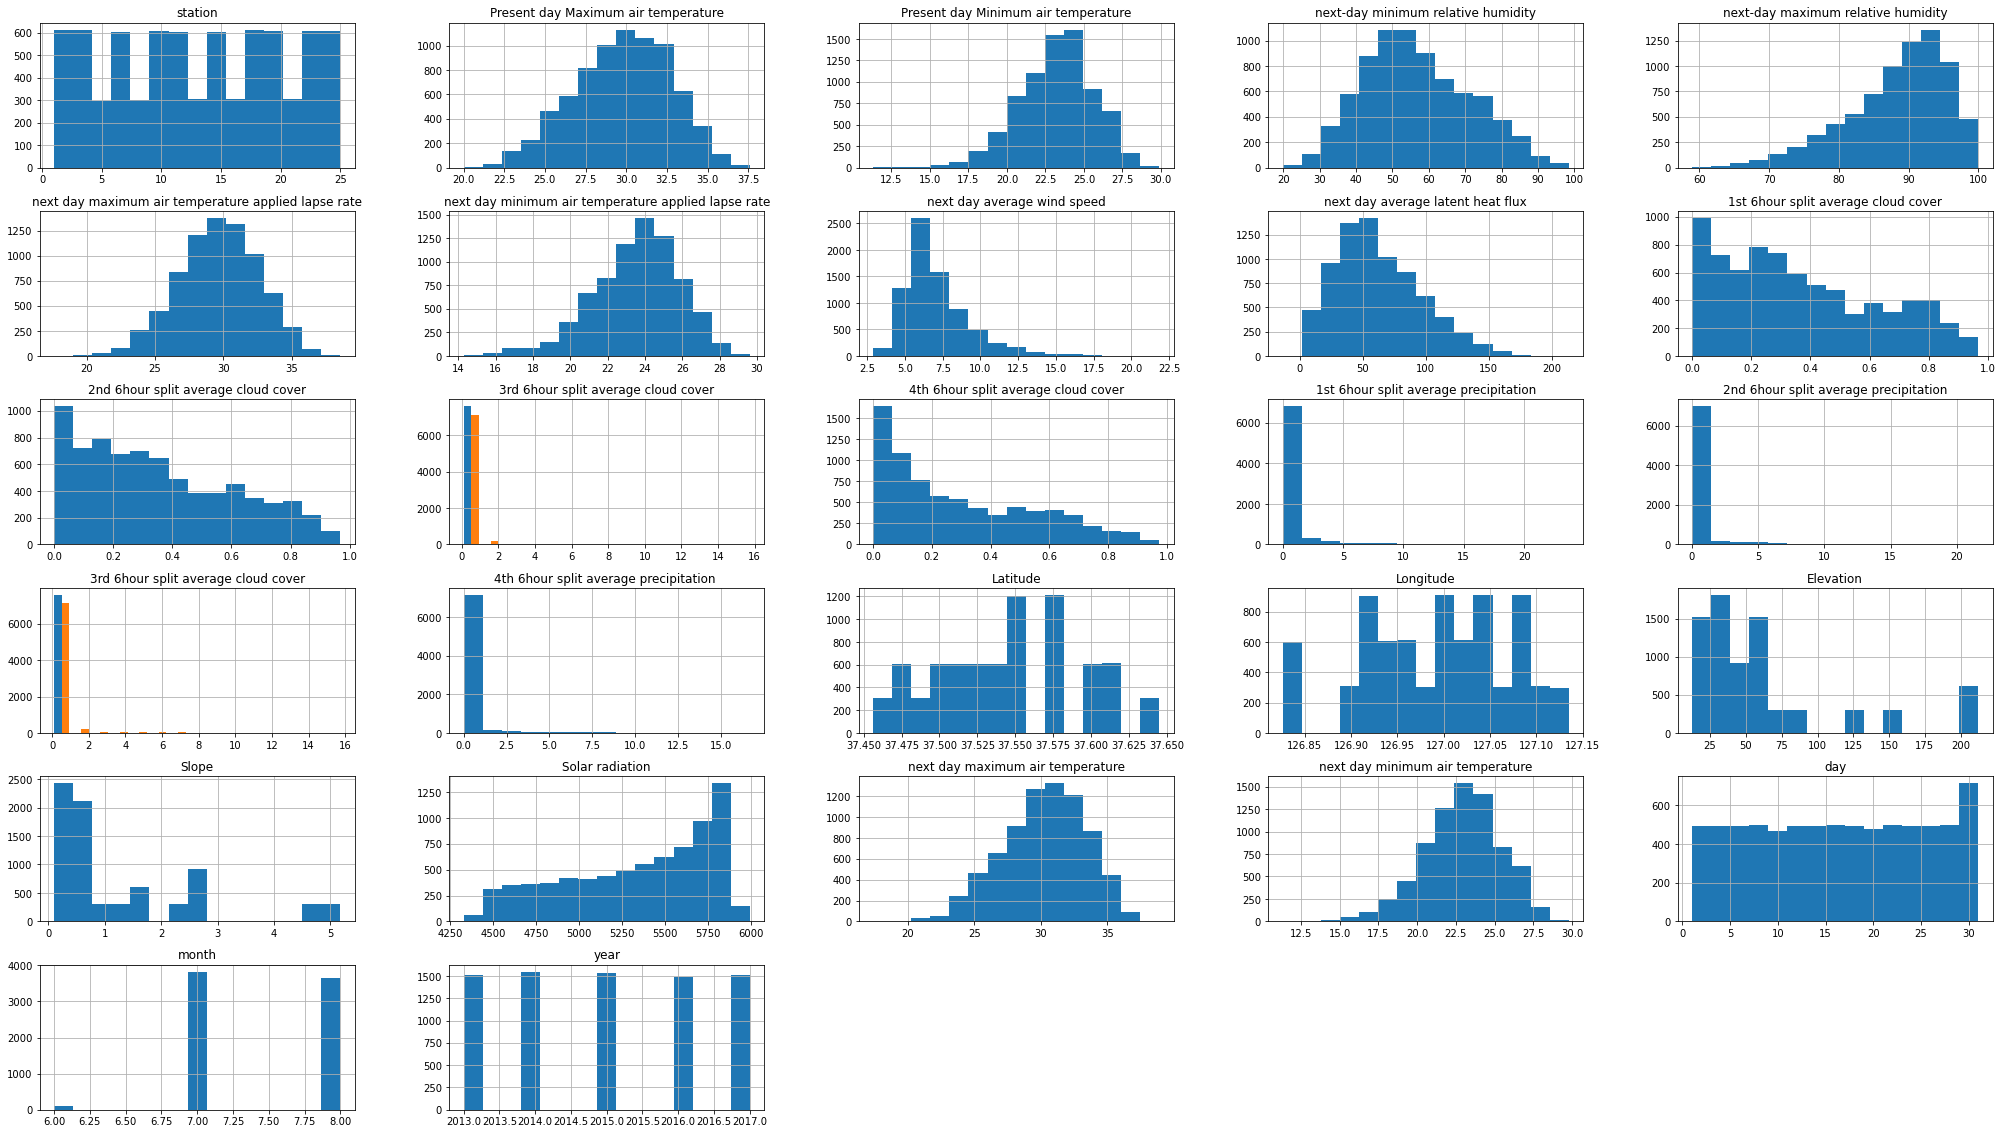

In [37]:
#checking for outliers
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()


In [38]:
# reducing skewness
x.skew()

station                                               -0.004178
Present day Maximum air temperature                   -0.257069
Present day Minimum air temperature                   -0.353822
next-day minimum relative humidity                     0.301396
next-day maximum relative humidity                    -0.845264
next day maximum air temperature applied lapse rate   -0.222349
next day minimum air temperature applied lapse rate   -0.574035
next day average wind speed                            1.553926
next day average latent heat flux                      0.662971
1st 6hour split average cloud cover                    0.456716
2nd 6hour split average cloud cover                    0.473929
3rd 6hour split average cloud cover                    0.639649
4th 6hour split average cloud cover                    0.663815
1st 6hour split average precipitation                  5.305906
2nd 6hour split average precipitation                  5.710360
3rd 6hour split average cloud cover     

In [39]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

x_new=pd.DataFrame(df_new,columns=x.columns)

x_new.skew()

station                                               -0.206291
Present day Maximum air temperature                   -0.036516
Present day Minimum air temperature                   -0.014363
next-day minimum relative humidity                    -0.018008
next-day maximum relative humidity                    -0.120174
next day maximum air temperature applied lapse rate   -0.012155
next day minimum air temperature applied lapse rate   -0.021647
next day average wind speed                            0.005937
next day average latent heat flux                      0.028141
1st 6hour split average cloud cover                    0.048221
2nd 6hour split average cloud cover                    0.047595
3rd 6hour split average cloud cover                    0.091156
4th 6hour split average cloud cover                    0.129974
1st 6hour split average precipitation                  1.451770
2nd 6hour split average precipitation                  1.637689
3rd 6hour split average cloud cover     

# Modelling 

#     1.Modeling with label as Maximum temperature

# Splitting data

In [74]:
x=df.drop(["next day maximum air temperature","next day minimum air temperature"],axis=1,inplace=False)
y=df["next day maximum air temperature"]

#scaling/Standardisation
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

#splitting data
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

# Finding best random state

In [75]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxr2=r2
        maxRS=i

print("Best r2 score is", maxr2,"on Random State",maxRS)

Best r2 score is 0.7862444693481626 on Random State 199


# Testing various models

In [76]:
x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=199)

In [77]:
#Linear Regression
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("r2 score of LinearRegression model is",r2_score(y_test,predlr))

r2 score of LinearRegression model is 0.7862444693481626


In [78]:
#DecisionTreeClassifier

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
predlr=dt.predict(x_test)
print("r2 score of DecisionTreeRegressor model is",r2_score(y_test,predlr))

r2 score of DecisionTreeRegressor model is 0.7864154734794396


In [79]:
#Random forest regressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predlr=rf.predict(x_test)
print("r2 score of RandomForestRegressor model is",r2_score(y_test,predlr))

r2 score of RandomForestRegressor model is 0.9087361179989725


In [80]:
#cross validation
#Finding overfitting
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import statsmodels.api

scr1=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Linear Regression model :", scr1.mean())

scr2=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr2.mean())

scr3=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr3.mean())


Cross validation score of Linear Regression model : 0.6845234234935784
Cross validation score of Decision Tree model : 0.4169681919355905
Cross validation score of Random Forest model : 0.697587698009953


# Reason for choosing the model

The best model is the linear regression model, as it shows the least difference between r2 score and cross validation score

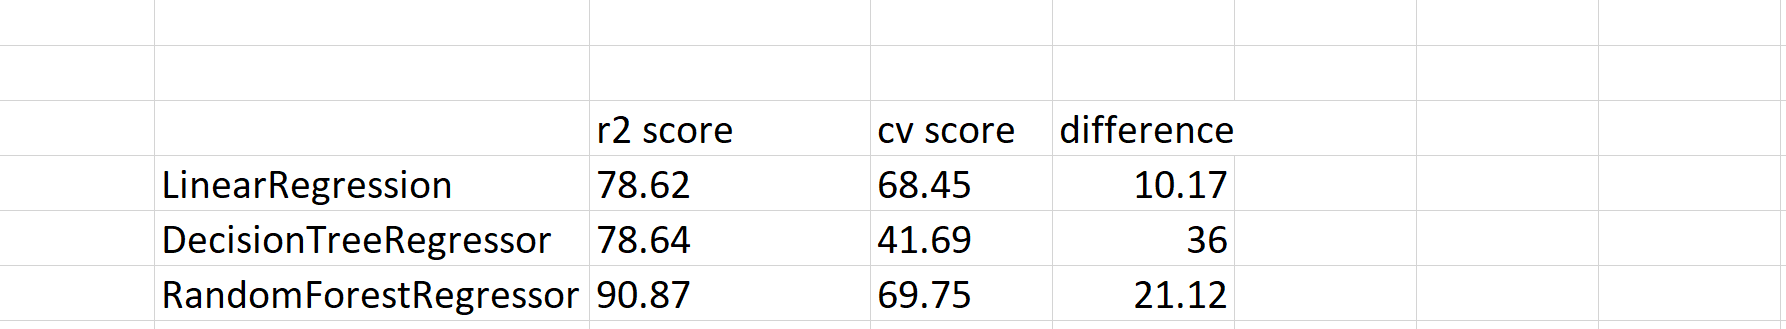

# Hyper parameter tuning

In [81]:
#Linear regression model
parameters = {'fit_intercept':['True', 'False'],
               'normalize':['True', 'False'],
               'copy_X':['True', 'False'],
              'n_jobs':[2,4,6,8,10,12],
 }

In [82]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=4)

In [83]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': [2, 4, 6, 8, 10, 12],
                         'normalize': ['True', 'False']})

In [84]:
GCV.best_estimator_

LinearRegression(copy_X='True', fit_intercept='True', n_jobs=2,
                 normalize='True')

In [85]:
mod=LinearRegression(copy_X='True', fit_intercept='True',n_jobs=2,normalize='True')

In [86]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

# Saving of model

In [87]:
#saving LinearRegression model
LinearRegression_tree_model=LinearRegression()
LinearRegression_tree_model.fit(x_train,y_train)

filename='finalized_model.pickle'
pickle.dump(LinearRegression_tree_model,open(filename,'wb'))

In [88]:
#Adjusted R2
LinearRegression_tree_model.score(x_train,y_train)

0.7847671329717932

In [89]:
y_pred=regression.predict(x_test)

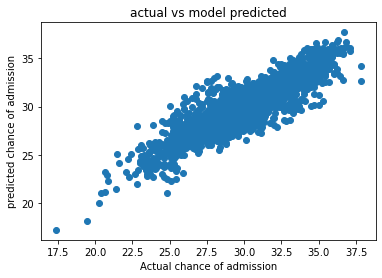

In [90]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

# Model evaluation

In [91]:
y_predict=regression.predict(x_test)

In [92]:
mean_absolute_error(y_test,y_pred)

1.108880507760528

In [93]:
mean_squared_error(y_test,y_pred)

2.1266828932125392

In [94]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.458315087082534

The mean abosolute error is 1.1 and mean squared error is 2.12

# Regularisation

In [71]:
lasscv=LassoCV(alphas=None, max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

#best alpha parameter
alpha=lasscv.alpha_

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

lasso_reg.score(x_test,y_test)

0.8186305647546832

In [72]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

ridgecv.alpha_

0.001

In [73]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

ridge_model.score(x_test,y_test)

0.8186310042236563

# 2. Model with Minimum temperature as label

In [95]:
x=df.drop(["next day maximum air temperature","next day minimum air temperature"],axis=1,inplace=False)
y=df["next day minimum air temperature"]

#scaling/Standardisation
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

#splitting data
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

#Finding best random state
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxr2=r2
        maxRS=i

print("Best r2 score is", maxr2,"on Random State",maxRS)

Best r2 score is 0.8274531511611973 on Random State 199


# Testing various models

In [96]:
x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=199)

#Linear Regression
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("r2 score of LinearRegression model is",r2_score(y_test,predlr))

#DecisionTreeClassifier
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
predlr=dt.predict(x_test)
print("r2 score of DecisionTreeRegressor model is",r2_score(y_test,predlr))

#Random forest regressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predlr=rf.predict(x_test)
print("r2 score of RandomForestRegressor model is",r2_score(y_test,predlr))

#cross validation
#Finding overfitting
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import statsmodels.api

scr1=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Linear Regression model :", scr1.mean())

scr2=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr2.mean())

scr3=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr3.mean())


r2 score of LinearRegression model is 0.8274531511611973
r2 score of DecisionTreeRegressor model is 0.7871754279543572
r2 score of RandomForestRegressor model is 0.9014583114039505
Cross validation score of Linear Regression model : 0.7811008528700387
Cross validation score of Decision Tree model : 0.5713329653823551
Cross validation score of Random Forest model : 0.780224417831828


# Reason for choosing the model

Linear regression model as it has the least score between r2 score and cross val

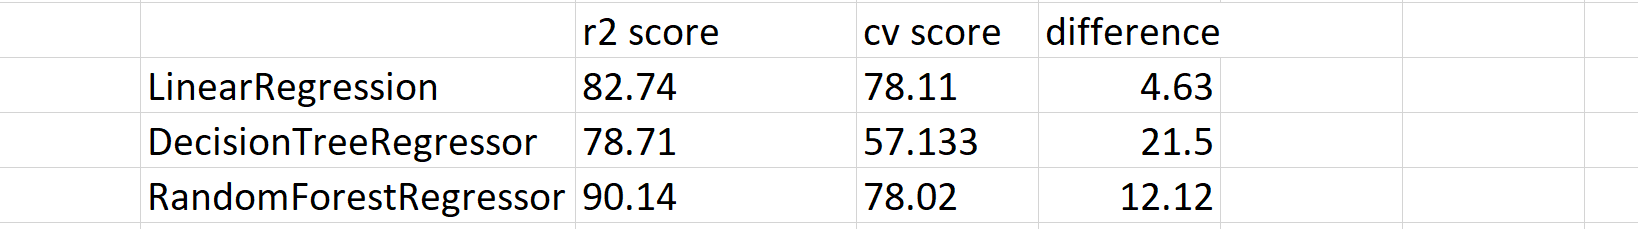

# Hyper parameter tuning¶

In [97]:
#Linear regression model
parameters = {'fit_intercept':['True', 'False'],
               'normalize':['True', 'False'],
               'copy_X':['True', 'False'],
              'n_jobs':[2,4,6,8,10,12],
 }

GCV=GridSearchCV(LinearRegression(),parameters,cv=6)

GCV.fit(x_train,y_train)

GCV.best_estimator_

LinearRegression(copy_X='True', fit_intercept='True', n_jobs=2,
                 normalize='True')

In [99]:
mod=LinearRegression(copy_X='True', fit_intercept='True',n_jobs=2,normalize='True')

regression2=LinearRegression()
regression2.fit(x_train,y_train)

LinearRegression()

# Saving of model

In [100]:
#saving LinearRegression model
LinearRegression_tree_model2=LinearRegression()
LinearRegression_tree_model2.fit(x_train,y_train)

filename='finalized_model.pickle'
pickle.dump(LinearRegression_tree_model2,open(filename2,'wb'))

#Adjusted R2
LinearRegression_tree_model2.score(x_train,y_train)

0.840478131285151

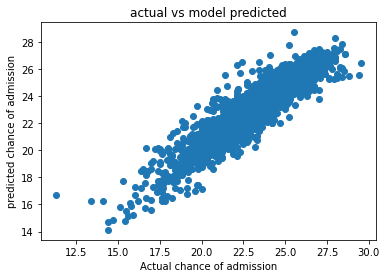

In [107]:
y_pred=regression2.predict(x_test)

plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

The model is almost accurate

# Model evaluation

In [108]:
y_predict=regression2.predict(x_test)

print("mean absolute error is",mean_absolute_error(y_test,y_pred))
print("mean squared error is",mean_squared_error(y_test,y_pred))
print("square root of mean squared error is",np.sqrt(mean_squared_error(y_test,y_pred)))

mean absolute error is 0.7994142825198047
mean squared error is 1.074335721703143
square root of mean squared error is 1.0365016747227875


# Regularisation

In [104]:
lasscv=LassoCV(alphas=None, max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

#best alpha parameter
alpha=lasscv.alpha_

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

lasso_reg.score(x_test,y_test)

0.8274473208442183

In [105]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

ridgecv.alpha_

0.001

In [106]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

ridge_model.score(x_test,y_test)

0.8274531439280559

# Results of model

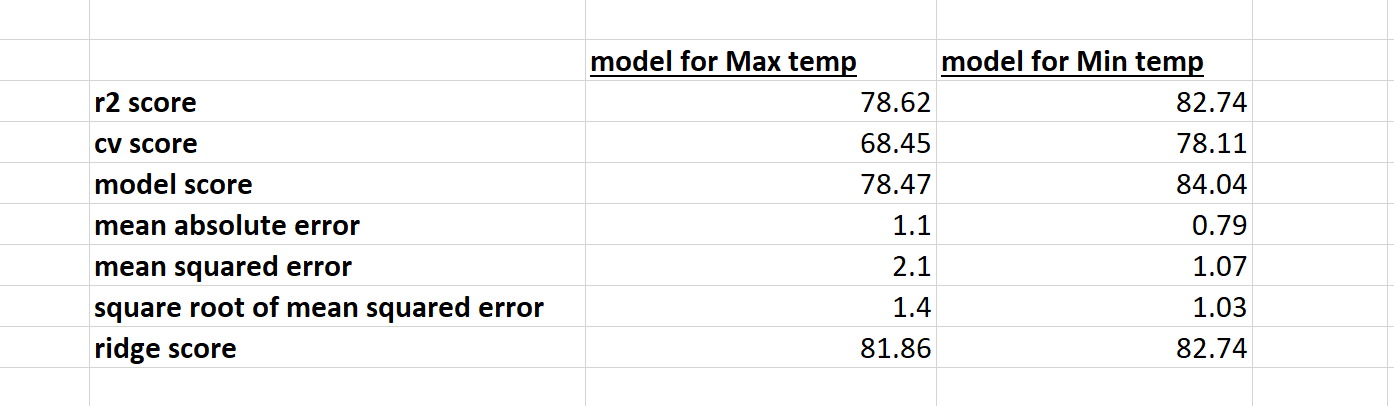